In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_csv(r'C:\Users\ADMIN\Downloads\South_Asian_dataset.csv')
df.tail(25)

,Country,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)","Foreign direct investment, net inflows (% of GDP)",Trade (% of GDP),Gini index,...,Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Control of Corruption: Percentile Rank,Political Stability and Absence of Violence/Terrorism: Estimate,Regulatory Quality: Estimate,Rule of Law: Estimate,Voice and Accountability: Estimate,Individuals using the Internet (% of population),Research and development expenditure (% of GDP),High-technology exports (% of manufactured exports)
167,Nepal,2023,4.090807e+10,1.952545,1324.031984,10.685,7.114760,0.180484,41.637495,NaN,...,..,..,..,..,..,..,..,..,..,..
168,Pakistan,2000,9.948480e+10,4.260088,644.457157,0.597,4.366665,0.309595,21.459969,NaN,...,51,5.852091117,22.87234116,-1.104804635,-0.766920447,-1.000389218,-1.220253587,..,0.115659997,..
169,Pakistan,2001,9.714562e+10,3.651350,610.143232,0.595,3.148261,0.389107,23.577209,28.7,...,51.5,5.797928342,..,..,..,..,..,1.31855,0.151649997,..
170,Pakistan,2002,9.792330e+10,2.594817,599.789411,0.597,3.290345,0.843517,23.129021,NaN,...,51.4,5.743765567,20.1058197,-1.637678623,-0.877513707,-0.931637406,-1.109006166,2.57743,0.198870003,..
171,Pakistan,2003,1.123720e+11,5.401311,673.382966,0.595,2.914135,0.475208,24.650166,NaN,...,50.1,5.689602792,24.33862495,-1.54904592,-0.827369988,-0.920624614,-1.170764208,5.04116,..,..
172,Pakistan,2004,1.322160e+11,7.831256,774.785336,0.588,7.444625,0.845586,24.808341,30.9,...,47.9,5.635440017,10.83743858,-1.582877994,-1.049112082,-0.994449377,-1.142131209,6.16432,..,..
173,Pakistan,2005,1.452090e+11,7.276574,832.751138,0.582,9.063327,1.515751,29.878498,31.3,...,48,5.581277242,14.63414669,-1.751388311,-0.641119778,-0.890321434,-0.976286173,6.33233,0.398490012,..
174,Pakistan,2006,1.618710e+11,6.051638,909.032403,0.582,7.921084,2.639750,33.049712,NaN,...,47,5.527114467,22.43902397,-2.024678469,-0.479762465,-0.857247531,-0.886475444,6.5,..,..
175,Pakistan,2007,1.841410e+11,4.444814,1012.182794,0.398,7.598684,3.035719,30.787880,29.7,...,44.9,5.472951692,21.84465981,-2.432705164,-0.537263751,-0.887544632,-0.949874163,6.8,0.632499993,..
176,Pakistan,2008,2.022040e+11,2.120441,1087.514777,0.423,20.286121,2.689367,34.348960,NaN,...,46.6,5.418788917,19.41747665,-2.573009491,-0.599021852,-0.972613692,-0.838403463,7,..,1.924735013


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 33 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   Country                                                                     192 non-null    object 
 1   Year                                                                        192 non-null    int64  
 2   GDP (current US$)                                                           190 non-null    float64
 3   GDP growth (annual %)                                                       189 non-null    float64
 4   GDP per capita (current US$)                                                190 non-null    float64
 5   Unemployment, total (% of total labor force) (modeled ILO estimate)         192 non-null    float64
 6   Inflation, consumer prices (annual %)             

In [4]:
df.isna().sum()

Country                                                                         0
Year                                                                            0
GDP (current US$)                                                               2
GDP growth (annual %)                                                           3
GDP per capita (current US$)                                                    2
Unemployment, total (% of total labor force) (modeled ILO estimate)             0
Inflation, consumer prices (annual %)                                           9
Foreign direct investment, net inflows (% of GDP)                               5
Trade (% of GDP)                                                               51
Gini index                                                                    150
Population, total                                                               0
Population growth (annual %)                                                    0
Poverty headcoun

In [5]:
df.shape

(192, 33)

In [6]:
df.columns

Index(['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Inflation, consumer prices (annual %)',
       'Foreign direct investment, net inflows (% of GDP)', 'Trade (% of GDP)',
       'Gini index', 'Population, total', 'Population growth (annual %)',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, infant (per 1,000 live births)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'School enrollment, primary (% gross)',
       'Urban population (% of total population)',
       'Access to electricity (% of population)',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)',
       'Carbon dioxide (CO2) emissions excluding LU

In [7]:
# Columns for mean aggregation
mean_cols = [
    'GDP growth (annual %)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Inflation, consumer prices (annual %)',
    'Research and development expenditure (% of GDP)',
    'Foreign direct investment, net inflows (% of GDP)'
]
df[mean_cols] = df[mean_cols].replace('..', 0)


In [8]:
df[mean_cols].head(20)

,GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",Research and development expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)"
0,NaN,7.955,NaN,0,0.004828
1,-9.431974,7.958,NaN,0,0.024169
2,28.600001,7.939,NaN,0,1.306950
3,8.832278,7.922,NaN,0,1.278493
4,1.414118,7.914,NaN,0,3.577104
5,11.229715,7.914,12.686269,0,4.368673
6,5.357403,7.918,6.784597,0,3.413773
7,13.826320,7.908,8.680571,0,1.935702
8,3.924984,7.920,26.418664,0,0.455360
9,21.390528,7.914,-6.811161,0,0.451889


In [10]:
df[mean_cols].tail(20)

,GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",Research and development expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)"
172,7.831256,0.588,7.444625,0,0.845586
173,7.276574,0.582,9.063327,0.398490012,1.515751
174,6.051638,0.582,7.921084,0,2.639750
175,4.444814,0.398,7.598684,0.632499993,3.035719
176,2.120441,0.423,20.286121,0,2.689367
177,3.472551,0.535,13.647765,0.448060006,1.248013
178,1.501718,0.653,12.938871,0,1.027911
179,2.680117,0.796,11.916093,0.329169989,0.575055
180,3.027584,3.667,9.682352,0,0.343453
181,4.366865,2.954,7.692156,0.292849988,0.515354


In [11]:
object_cols = df[mean_cols].select_dtypes(include='object').columns
print(object_cols)

df['Research and development expenditure (% of GDP)']

Index(['Research and development expenditure (% of GDP)'], dtype='object')


0                0
1                0
2                0
3                0
4                0
          ...     
187        0.17475
188              0
189    0.164430007
190              0
191              0
Name: Research and development expenditure (% of GDP), Length: 192, dtype: object

In [18]:
df['Research and development expenditure (% of GDP)'] = pd.to_numeric(
    df['Research and development expenditure (% of GDP)'], errors='coerce'
)

In [22]:
df[mean_cols] = df.groupby("Country")[mean_cols].transform(lambda x: x.fillna(x.mean()))

In [23]:
df[mean_cols].tail()

,GDP growth (annual %),"Unemployment, total (% of total labor force) (modeled ILO estimate)","Inflation, consumer prices (annual %)",Research and development expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)"
187,2.497637,4.830,10.578362,0.17475,0.696146
188,-1.274087,6.162,9.739993,0.00000,0.684695
189,6.513886,6.338,9.496211,0.16443,0.616039
190,4.767540,5.548,19.873860,0.00000,0.390087
191,-0.004855,5.499,30.768128,0.00000,0.537284


In [25]:
table = df.pivot_table(
    index='Country',
    values= mean_cols,
    aggfunc='mean'
)

print(table)

             Foreign direct investment, net inflows (% of GDP)  \
Country                                                          
Afghanistan                                           0.987221   
Bangladesh                                            0.793232   
Bhutan                                                1.036503   
India                                                 1.612772   
Maldives                                              8.331265   
Nepal                                                 0.249302   
Pakistan                                              0.944817   
Sri Lanka                                             1.168767   

             GDP growth (annual %)  Inflation, consumer prices (annual %)  \
Country                                                                     
Afghanistan               4.688141                               6.124620   
Bangladesh                6.035825                               6.486358   
Bhutan                    5.861

In [123]:
len(table.columns)

5

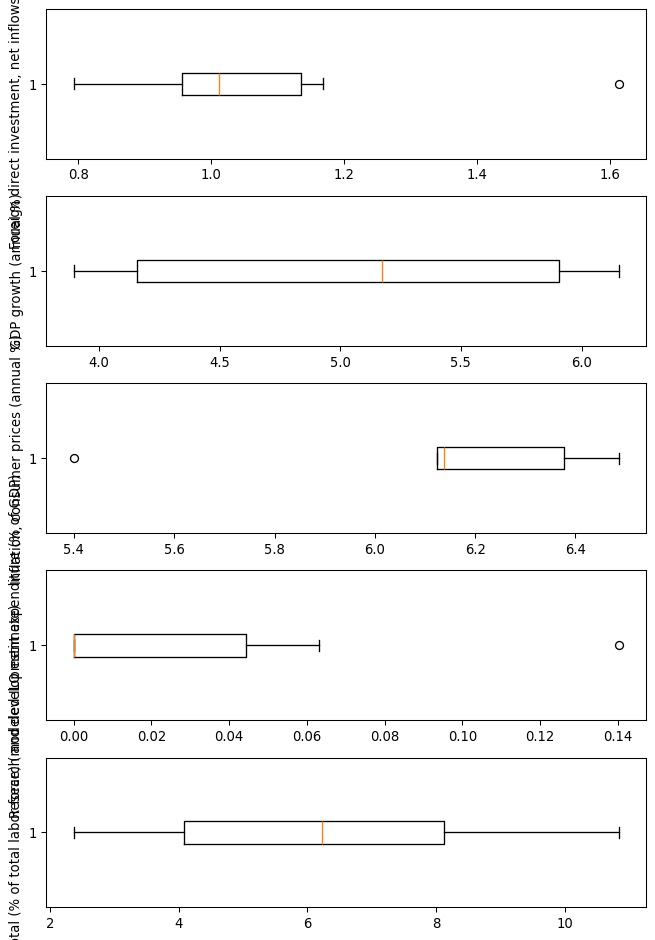

In [133]:
fig, axs = plt.subplots(5, 1, dpi=95, figsize=(7, 10))

for i, col in enumerate(table.columns):
    axs[i].boxplot(table[col].dropna(), vert=False)
    axs[i].set_ylabel(col)
    

plt.tight_layout()
plt.show()

In [30]:
for col in table.columns:
    data = pd.to_numeric(table[col], errors='coerce')
    q1, q3 = np.percentile(data.dropna(), [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    table[col] = data.where((data >= lower_bound) & (data <= upper_bound))





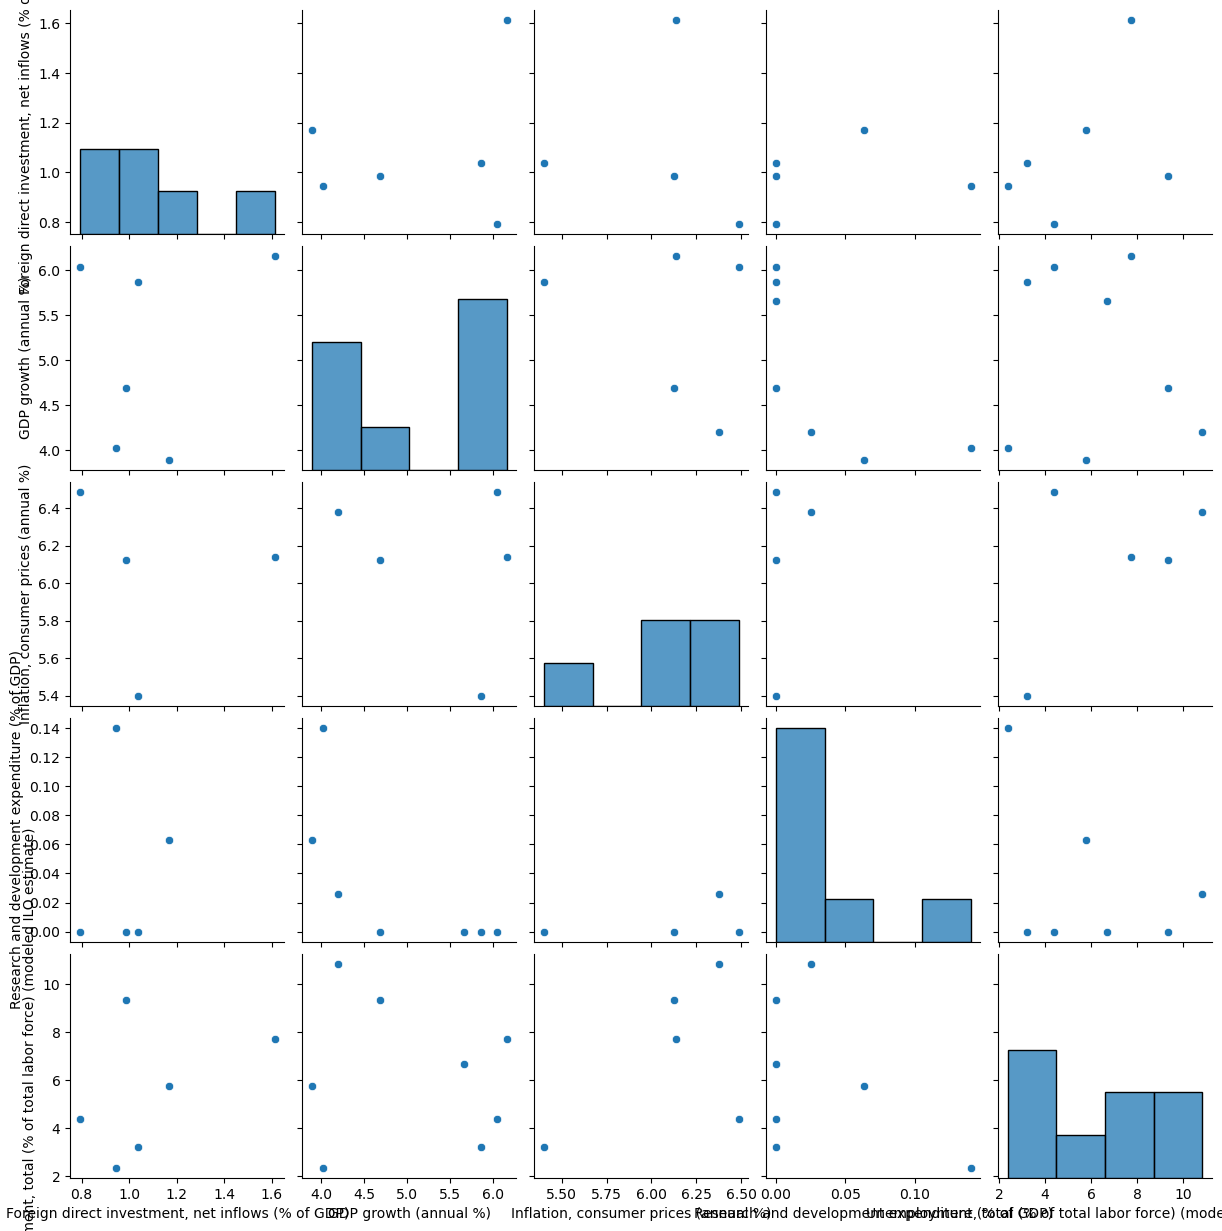

In [77]:
sns.pairplot(table)
plt.show()

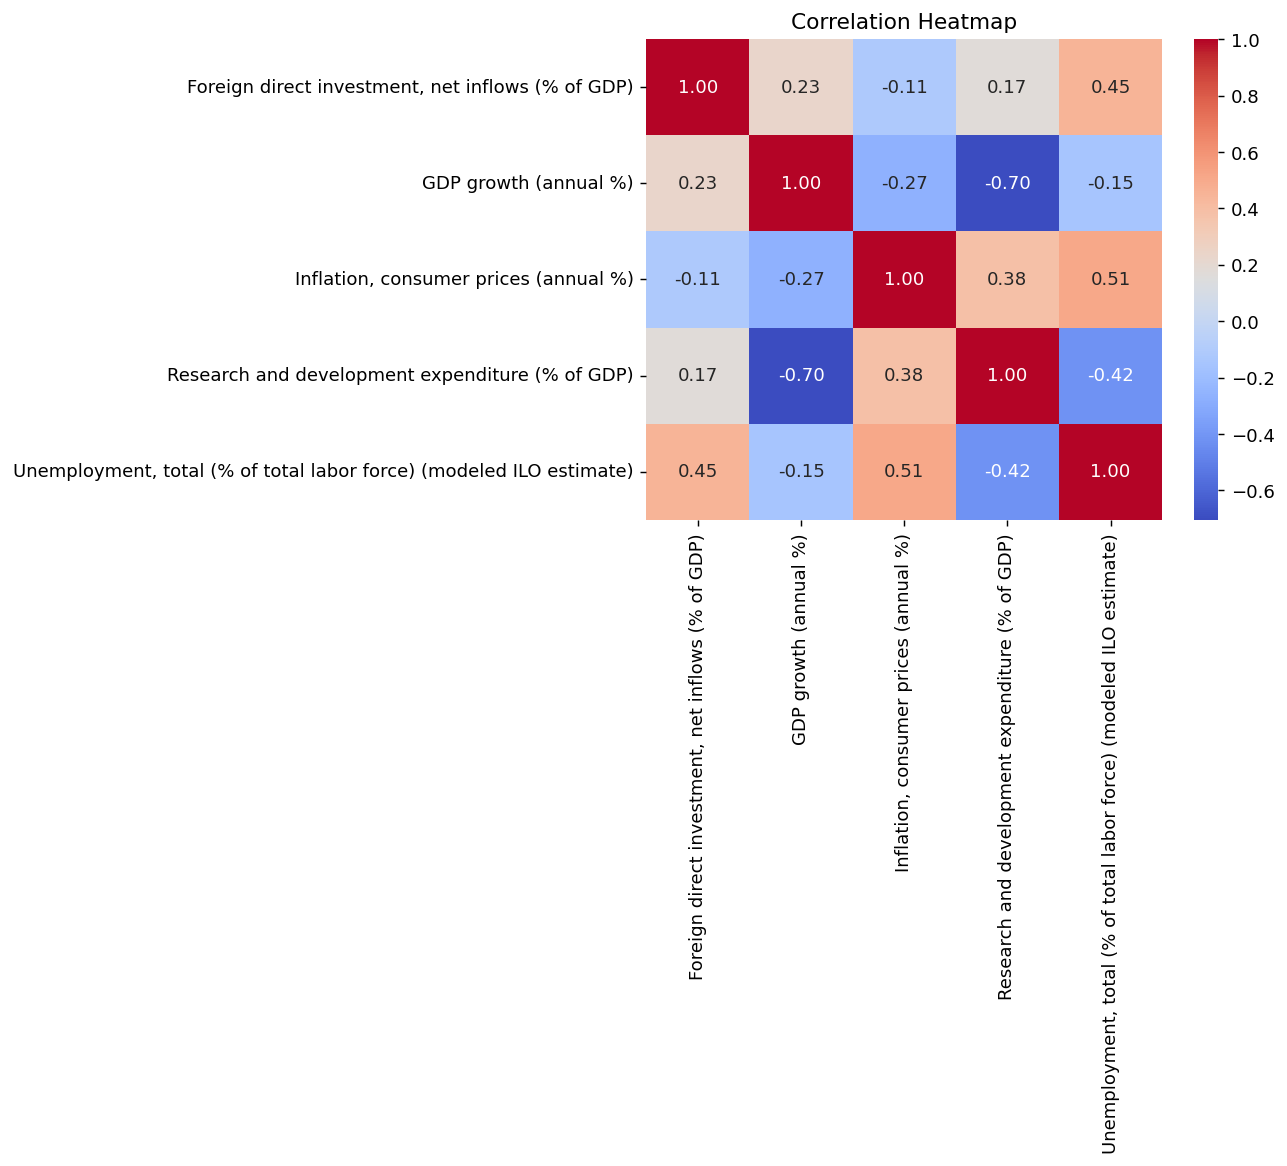

In [31]:
numeric_table = table.select_dtypes(include='number')
corr = numeric_table.corr()

plt.figure(dpi=130)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [135]:
x = df[mean_cols]
y = df['GDP growth (annual %)']

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [119]:
from sklearn import linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Linear Regression
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("\n--- Linear Regression ---")
print(lr_preds)
print("MAE :", metrics.mean_absolute_error(y_test, lr_preds))
print("MSE :", metrics.mean_squared_error(y_test, lr_preds))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lr_preds)))

# Decision Tree
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print("\n--- Decision Tree ---")
print(dt_preds)
print("MAE :", metrics.mean_absolute_error(y_test, dt_preds))
print("MSE :", metrics.mean_squared_error(y_test, dt_preds))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, dt_preds)))

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("\n--- Random Forest ---")
print(rf_preds)
print("MAE :", metrics.mean_absolute_error(y_test, rf_preds))
print("MSE :", metrics.mean_squared_error(y_test, rf_preds))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, rf_preds)))



--- Linear Regression ---
[  4.42136739   5.05362489   7.92293661  -2.29804511   7.05453901
   3.4725506    1.45131466   1.18922813   2.2603142   21.39052839
   8.06073257   6.57223607   7.31941263   6.59025      4.53307872
   5.64080526   4.79989214   6.93867912   3.9717157    3.44801755
   5.40131087   4.81641465  13.90667638   7.26838641   7.88191515
   7.29833574   3.3550683    6.01148284   6.52145878   4.20748598
   8.66800624   5.63131456   3.91160342   6.45385134   2.59481668
  11.22971483   4.05174633  -7.34676438   4.83814961   8.4975847
   6.96324663   7.6223761    8.30764783   4.20595548   3.50187186
   4.11642817 -11.22316621   7.05859935   7.86038148   7.6682919
   6.93507147   4.67014192   6.01378976   4.7395674    6.65705543
   5.71786561  16.10478365   3.4218087   12.75228709   3.5075674
   3.97605327   6.51388576   6.57383828  -3.94363429  10.44377954
   5.94026908   6.3861064    7.58397112  28.60000116   5.21386784
   5.81636693   9.68959249   5.95008814   5.09549264